# Binäre Klassifikation - Bewertung
In den vorherigen Jupyter Notebooks wurde bei den verschiedenen Modellen betrachtet, wie viele Testinstanzen korrekt vorhergesagt wurden.
Hier wird nun genauer und detaillierter untersucht, welche weiteren Kennzahlen es für die Bewertung gibt.
Damit können dann verschiedene Modelle verglichen werden.

In [1]:
# --- imports
import numpy as np 
import matplotlib.pyplot as plt 

from sklearn import metrics 

from tools import show_confusion_matrix_extended

## 1 Daten für habitable Planeten

Nachdem für eine kleine Menge von Planeten die Untersuchung auf habitable Planeten durchgeführt wurde,
wird nun die komplette Menge der derzeit verfügbaren Daten herangezogen. 
Die aufbereiteten Daten stehen als `numpy`-Array zur Verfügung.

In der CSV-Datei sind fünf Spalten enthalten:
- die erste Spalte ist nur eine Durchnumerierung der Daten,
- `S_MASS` (Masse des Sterns in Sonnenmassen), 
- `P_PERIOD` (Umlaufzeit des Planeten in Tagen),
- `P_DISTANCE` (Entfernung des Planeten zum Stern in Astronomischen Einheiten (AU)) und
- `P_HABITABLE` (Kennzeichen, ob habitable (1 habitabel, 0 nicht habitable)).

In [2]:
# --- read the data - complete
filename = 'HabitablePlanets_work.csv'
hwc = np.genfromtxt (filename, delimiter=',', \
                     usecols = (1, 2, 3, 4), skip_header = 1)
print (f"number of               exoplanets in the list : {hwc.shape [0]:5d}")

# -- split in features and label
hwc_features = hwc [:,0:3]
hwc_label = hwc[:,3]
unique, counts = np.unique (hwc_label, return_counts = True)
print (f"number of not habitable exoplanets in the list : {counts [0]:5d}")
print (f"number of     habitable exoplanets in the list : {counts [1]:5d}")

number of               exoplanets in the list :  5350
number of not habitable exoplanets in the list :  5280
number of     habitable exoplanets in the list :    70


### 3 Bewertungen
Die **Geanuigkeit** (*accuracy*) wurde bereits in vorherigen Untersuchungen berechnet.
Es ist der Quotient zwischen korrekten Vorhersagen und allen Elementen.
Beim Beispiel der habitablen Planeten gibt es 70 habitable Planeten von insgesmat 5350 untersuchten Planeten.
Wenn automatisch jeder Planet als nicht habitable vorhergesagt wird (*faule Zuordnung*), 
dann ist die Genauigkeit bei $(5350 - 70) / 5350 = 0.987$, also bei $98.7 \%$.
Ein scheinbar hervorragender Wert. Dieser Wert ergibt sich jedoch, da es fast 
keine habitablen Planeten gibt. Daher ist bei dieser extrem unausgeglichenen Menge 
die Aussagekraft dieser Kennzahl sehr gering. Es bedarf weiterer Kennzahlen.

### Genauigkeit, Präzision und Trefferquote
Bei einer binären Klassifikation gibt es für jedes Element zwei mögliche Klassen
und zwei mögliche Vorhersagen.
Die beiden Klassen werden mit positiv (**P**) und negativ (**N**) bezeichnet.
Die positive Klasse ist die Basis- oder Grundklasse (*ground truth*).
Im Beispiel der habitablen Planeten stehe **P** für habitable und **N** für nicht habitable.
Die Vorhersage für die Elemente können wahr (True, **T**) sein, die Klasse wurde richtig vorhergesagt, 
oder falsch (False, **F**) sein, die Klasse wurde nicht richtig vorhergesagt. 
Daher gibt es vier Kennzahlen:
- **TP** (true positive): die Anzahl der Elemente, bei denen das positive Merkmal korrekt vorhergesagt wurde
  (korrekt klassifiziert als positiv),
- **TN** (true negative): die Anzahl der Elemente, bei denen das negative Merkmal korrekt vorhergesagt wurde
  (korrekt klassifiziert als negativ),
- **FP** (false positive): die Anzahl der Elemente, bei denen das positive Merkmal nicht korrekt vorhergesagt wurde
  (nicht korrekt klassifiziert als positiv) und
- **FN** (false negative): die Anzahl der Elemente, bei denen das negative Merkmal nicht korrekt vorhergesagt wurde
  (nicht korrekt klassifiziert als negativ).

Somit betrachtet der zweite Buchstabe (P / N) die Klassifikation durch das Modell. 
Der erste Buchstabe (T / F) besagt, ob die getroffene Klassifizierung korrekt (T) oder nicht korrekt (F) ist.

Die **Genauigkeit** (*accuracy*) ist damit definiert durch
$$ accuracy = \frac{TN + TP}{TP + TN + FP + FN} .$$
Es können zwei weitere wichtige Kennzahlen definiert werden.

Die **Präzision** (*precision*) 
$$ precision = \frac{TP}{TP + FP} $$
ist der Anteil der Elemente in der positiven Klasse, die korrekt vorhergesagt wurden.
Die **Trefferquote** (*recall*) 
$$ recall = \frac{TP}{TP + FN} $$
ist der Anteil der korrekt vorhergesagten Elemente in der Menge, die als positiv vorhergesagt wurden.

Bei dem obigen Beispiel der habitablen Planeten mit der *faulen Zuordnung* ist 
die Präzision undefiniert, da $TP + FP = 0$ ist. Die Trefferquoto ist $0 = 0 / (0 + 70)$.
Das zeigt, dass die *faule Zuordnung* zwar eine hohe Genauigkeit hat, aber nicht brauchbar ist.

Wünschenswert ist ein Modell, das eine sehr hohe Präzision und eine sehr hohe Trefferquto hat.
Am Besten jeweils 1. Dann sind **FP** und **FN** jeweils Null, 
da alle Elemente korrekt vorhergesagt werden. Damit ergibt sich für die Genauigkeit der Wert 1.
 
**Hinweis**: Präzision und Trefferquote sind nicht symmetrisch. 
Werden die positive und negative Klasse getauscht, 
dann ergeben sich (mit den bisherigen Bezeichnungen) 
$precision = TN / (TN + FN) = 1$ und $recall = TN / (TN + FP) = 0.987$.
Dies sind komplett andere Werte. 
Daher ist es wichtig darauf zu achten, welches die positive Klasse ist!


### 3 Anwendung der Modelle DT 
In vorherigen Jupyter Notebooks wurde das Modell Entscheidungsbaum (Decision Tree) trainiert und gespeichert.
Genauer wurden drei verschiedene Modelle trainiert und gespeichert.
Das erste trainierte Modell wird nun eingelesen und dann auf die gesamte Menge der Planenten angewendet.

In [3]:
import pickle

# --- read trained model
filename_DT1 = "DT1-habitable.pkl"
with open (filename_DT1, "rb") as f:
    DT1_model = pickle.load (f)

Nun wird diese Modell auf die gesamte Menge der Planeten angewendet.
Ein Training muss nicht mehr stattfinden, das wurde vorher erledigt.
Jetzt wird das Modell nur noch angewendet.

Die Ergebnisse, also die Zahlen für **TP**, **TN**, **FP** und **FN** werden mit einer sogenannten **Wahrheitsmatrix** (*confusion matrix*).
DIes ergibt eine gute Übersicht.
Weiterhin werden die Werte Genauigkeit, Präzision und Trefferquote ausgegeben.

Dies wird als eine Prozedur realisiert, da die Gesamtmenge auch mit den anderen trainierten Modelle getestet wird.

Erstes Modell anwenden

In [4]:
# --- predict
y_pred1 = DT1_model.predict (hwc_features)
show_confusion_matrix_extended (hwc_label, y_pred1, labels = ["non hab", "hab"])

  Confusion Matrix       |     predicted label     |
                         | non hab    | hab        |
-------------------------+------------+------------+
              non hab    | TN=   4257 | FP=   1023 |
  true label  -----------+------------+------------+
              hab        | FN=      6 | TP=     64 |
-------------------------+------------+------------+

    accuracy    = 0.8077
    precision   = 0.0589
    recall      = 0.9143
    FP-rate     = 0.1938
    TP-rate     = 0.9143
    F1-score    = 0.1106


Das positive Label ist 'habitable'. 
Die Genauigkeit ist $(64 + 4257) / (64 + 6 + 4257 + 1023) = 0.808$.
Die Präzision ist $64 / (64 + 1023) = 0.059 = 0.059$, denn viele nicht habitable Planeten wurden als habitable eingestuft.
DIe Trefferquote ist $64 / (64 + 6) = 0.914$, denn von den 70 habitablen Planeten wurden 64 korrekt klassifiziert. 

Jetzt wird das zweite Modell eingelesen und angewendet.

In [5]:
# --- read trained model
filename_DT2 = "DT2-habitable.pkl"
with open (filename_DT2, "rb") as f:
    DT2_model = pickle.load (f)
# --- predict
y_pred2 = DT2_model.predict (hwc_features)
show_confusion_matrix_extended (hwc_label, y_pred1, labels = ["non hab", "hab"])

  Confusion Matrix       |     predicted label     |
                         | non hab    | hab        |
-------------------------+------------+------------+
              non hab    | TN=   4257 | FP=   1023 |
  true label  -----------+------------+------------+
              hab        | FN=      6 | TP=     64 |
-------------------------+------------+------------+

    accuracy    = 0.8077
    precision   = 0.0589
    recall      = 0.9143
    FP-rate     = 0.1938
    TP-rate     = 0.9143
    F1-score    = 0.1106


Die Genauigkeit und die Präzision sind etwas besser, wobei die Präzision nicht gut ist.
Die Trefferquote ist geringer.

Jetzt wird das dritte Modell eingelesen und angewendet.

In [6]:
# --- read trained model
filename_DT3 = "DT3-habitable.pkl"
with open (filename_DT3, "rb") as f:
    DT3_model = pickle.load (f)
# --- predict
y_pred3 = DT3_model.predict (hwc_features)
show_confusion_matrix_extended (hwc_label, y_pred3, labels = ["non hab", "hab"])

  Confusion Matrix       |     predicted label     |
                         | non hab    | hab        |
-------------------------+------------+------------+
              non hab    | TN=   5021 | FP=    259 |
  true label  -----------+------------+------------+
              hab        | FN=     20 | TP=     50 |
-------------------------+------------+------------+

    accuracy    = 0.9479
    precision   = 0.1618
    recall      = 0.7143
    FP-rate     = 0.0491
    TP-rate     = 0.7143
    F1-score    = 0.2639


Dieses dritte Modell ist bei der Genauigkeit und der Präzision besser als die anderen, 
jedoch in der Trefferquote schlechter als das erste Modell.
Die Präzision ist jedoch weiterhin gering.

Aber alle drei Modelle hatten eine sehr, sehr kleine Trainingsmenge.

### 4 Training mit einer größeren Trainingsmenge
Jetzt wird eine größere Trainingsmenge generiert.
Die komplette große Menge der Planeten wird als Lernmenge betrachtet.
Die Elemenete werden zufällig bestimmt.
Wichtig ist dabei, dass auch habitable Planeten in die Trainingsmenge kommen, 
denn ansonsten wird alles als nicht habitable klassifiziert.

In [7]:
from sklearn.model_selection import train_test_split

# --- split in training set / test set
X_train, X_test, y_train, y_test \
    = train_test_split(hwc_features, hwc_label, random_state=2024)
print (f"Elements in the training set   : {X_train.shape [0]:5d}")
unique, counts = np.unique (y_train, return_counts = True)
print (f"  thereof habitable exoplanets : {counts [1]:5d}")
print (f"Elements in the test set       : {X_test.shape [0]:5d}")
unique, counts = np.unique (y_test, return_counts = True)
print (f"  thereof habitable exoplanets : {counts [1]:5d}")

Elements in the training set   :  4012
  thereof habitable exoplanets :    49
Elements in the test set       :  1338
  thereof habitable exoplanets :    21


Jetzt wird wieder ein Entscheidungsbaum erstellt, so wie es schon mit der kleinen Menge durchgeführt wurde.

In [8]:
from sklearn.tree import DecisionTreeClassifier

# --- define model
DT_model = DecisionTreeClassifier (random_state=2024)
print (DT_model)

# --- fit (train)
%timeit DT_model.fit (X_train, y_train)

DecisionTreeClassifier(random_state=2024)
6.23 ms ± 281 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Die grafische Darstellung des Entscheidungsbaumes ist etwas unübersichtlich, 
da tief (15 Ebenen) und verzweigt.

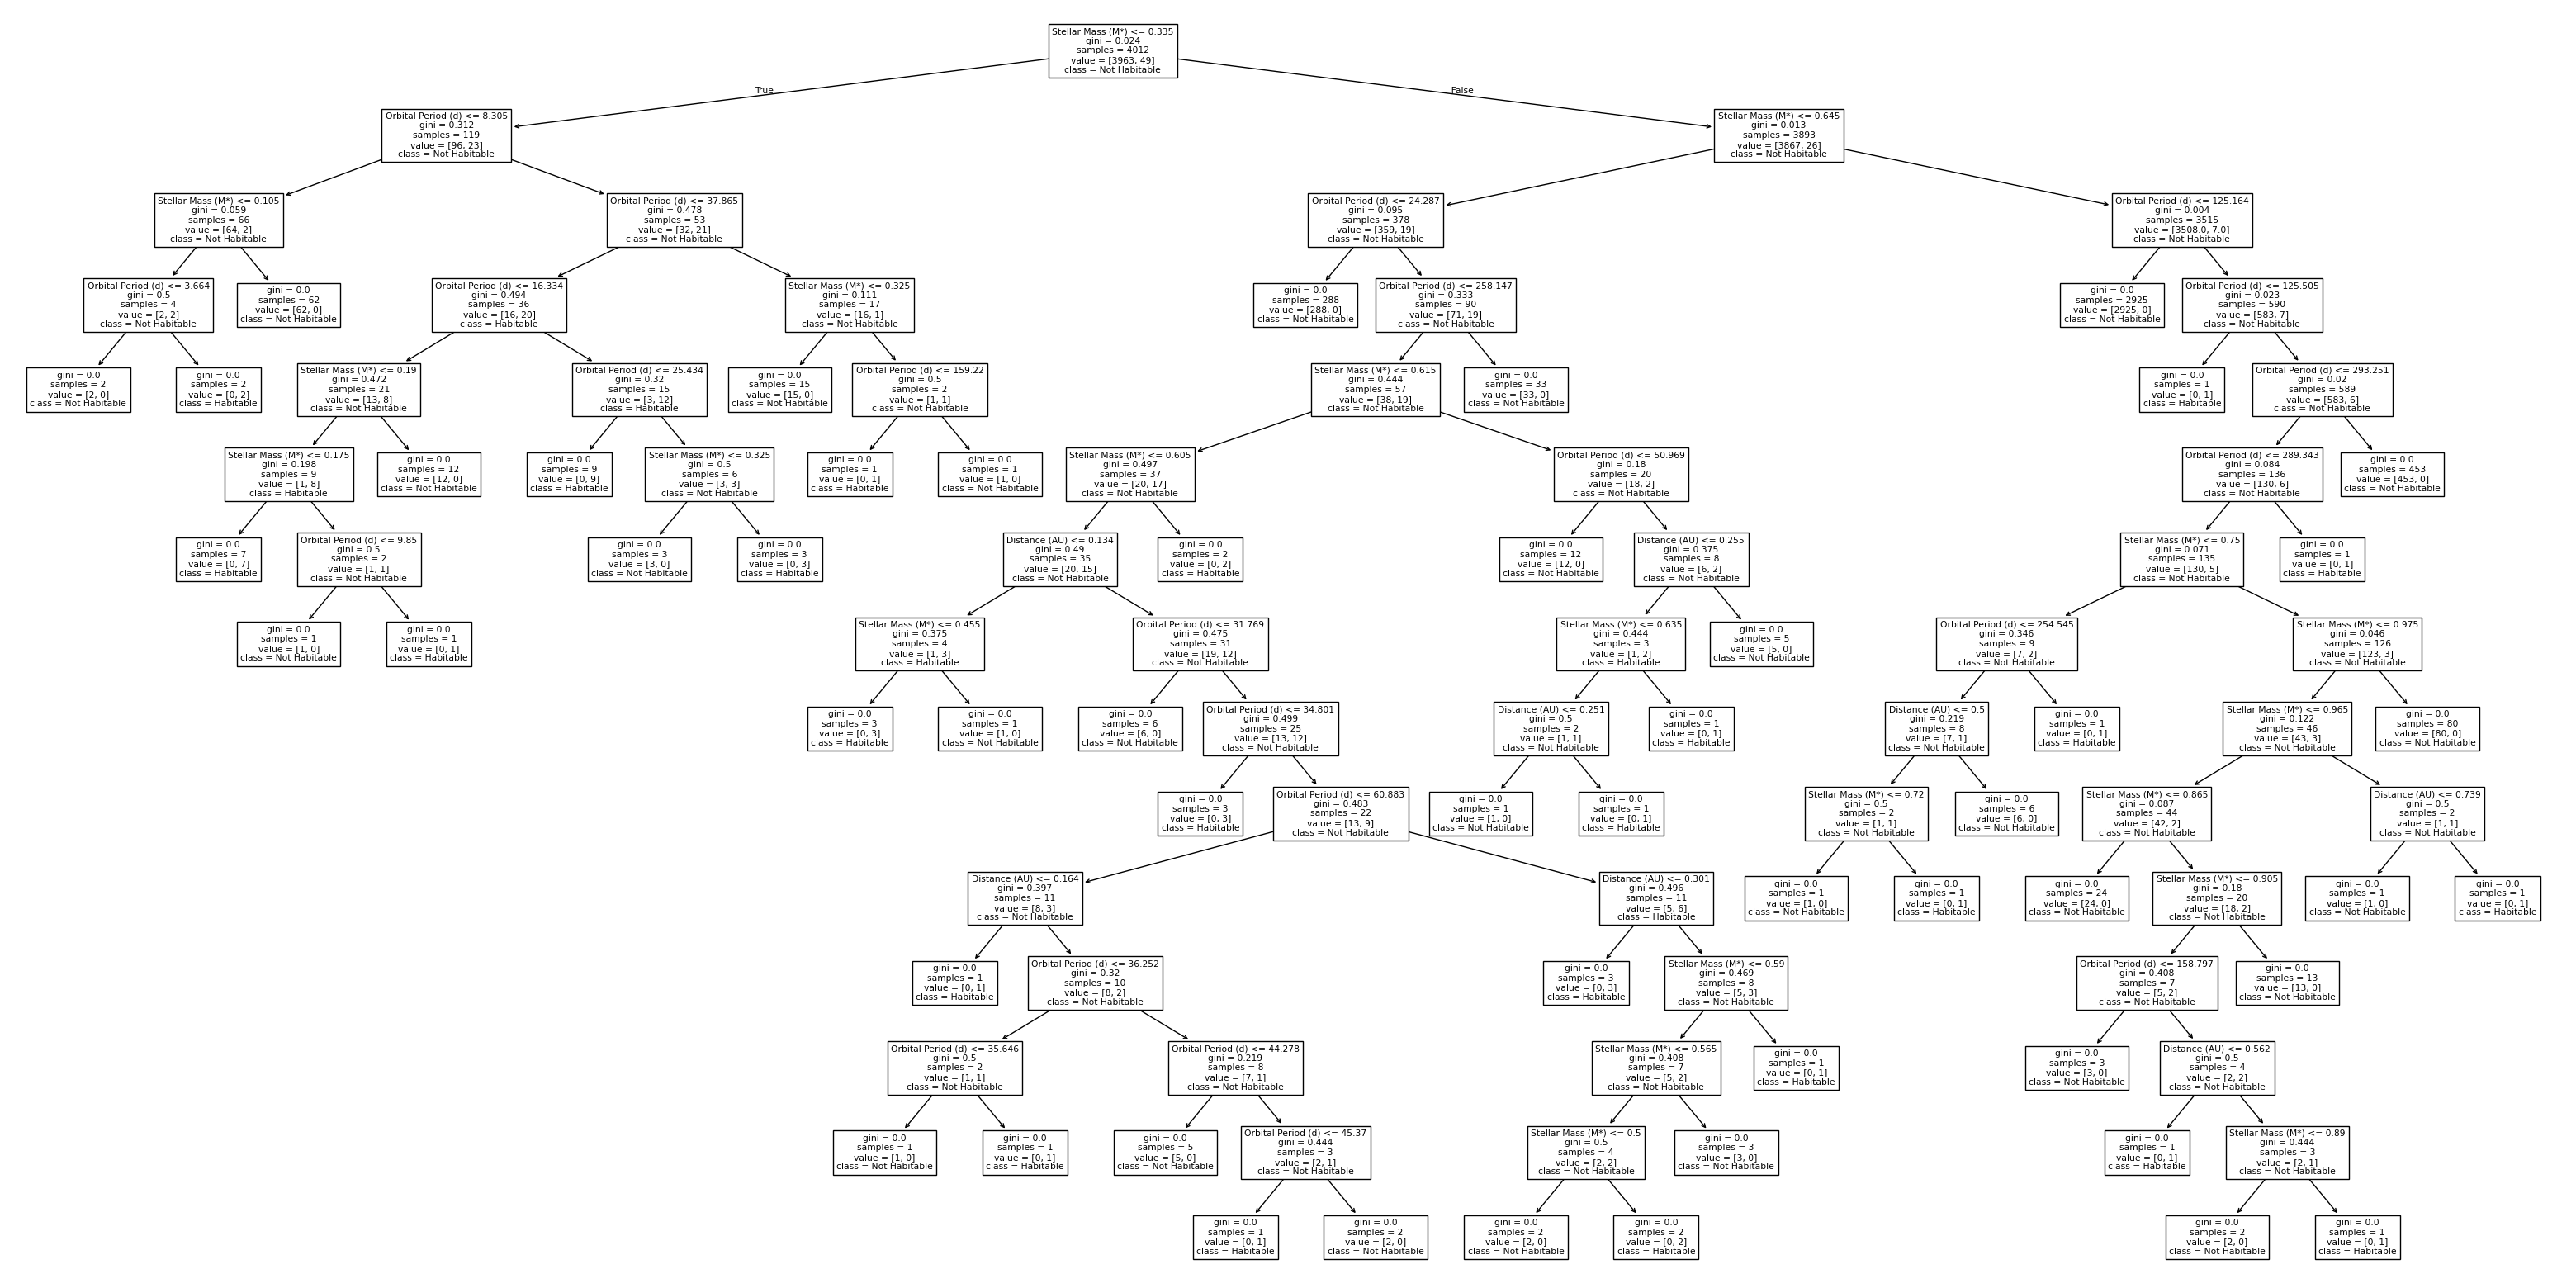

In [9]:
from sklearn import tree
# --- visualize decision tree
plt.figure (figsize=(40,20))  
tree.plot_tree (DT_model, feature_names = ['Stellar Mass (M*)', \
    'Orbital Period (d)', 'Distance (AU)'], \
    class_names = ['Not Habitable','Habitable'])
plt.show()

Dieses Model hat für die Trainingsmenge eine 100% Genauigkeit,
denn für den Entscheidungsbaum wurde keine Begrenzung bezüglich der Tiefe vorgegeben.
Damit wurde so lange die Bereiche geteilt, bis alle Bereich rein sind.
Damit wird die Genauigkeit auf der Traningsmenge 100% sein.
Aber wie hoch ist die Genauigkeit bei der Testmenge?

In [10]:
# --- predict
y_pred_train = DT_model.predict (X_train)
print (f"  accuracy (training set) : " \
       + f"{metrics.accuracy_score (y_train, y_pred_train):5.3f}")
y_pred = DT_model.predict (X_test)
print (f"  accuracy (test set)     : " \
       + f"{metrics.accuracy_score (y_test, y_pred):5.3f}")

  accuracy (training set) : 1.000
  accuracy (test set)     : 0.987


Die Genauigkeit bei der Trainingsmenge ist, wie erwartet bei 100%.
Die Geanuigkeit in der Testmenge ist bei 98,7 %, also etwa genau so gut wie bei der Strategie, alles als nicht habitable zu klassifizieren.
Wie sehen die anderen Kennzahlen aus? Dazu die Wahrheitsmatrix.

In [11]:
show_confusion_matrix_extended (y_test, y_pred, labels = ["non hab", "hab"])

  Confusion Matrix       |     predicted label     |
                         | non hab    | hab        |
-------------------------+------------+------------+
              non hab    | TN=   1312 | FP=      5 |
  true label  -----------+------------+------------+
              hab        | FN=     12 | TP=      9 |
-------------------------+------------+------------+

    accuracy    = 0.9873
    precision   = 0.6429
    recall      = 0.4286
    FP-rate     = 0.0038
    TP-rate     = 0.4286
    F1-score    = 0.5143


Die Erebnisse sind nicht so gut.

Wie schon vorher gesagt und gezeigt wurde, hängt das Ergebnis des Trainings stark von der Auswahl der Trainingsmenge ab.
Kann dies variabler gesteuert werden, dass es verschiedene Durchläufe gibt, bei denen sich die Trainingsmenge ändert
und am Ende ein geeignetes (das beste) Modell ausgewählt wird?

### ROC und AUC

Bei der binären Klassifikation ist das Ergebnis der Klassifikation ein Wert,
der ohne Beschränkung der Allgemeinheit als $1$ / $Positiv$ und $0$ / 
$Negativ$ bezeichnet wird. Oftmals ist die Entscheidung, welche Klasse gewählt 
wird nur eine Aussage mit eine bestimmten Wahrscheinlichkeit. Es sei $P 
(Class = Positiv) = p$ die Wahrscheinlichkeit, dass die Klasse $Positiv$ 
erkannt wird. Für die Entscheidung, dass die Klasse $Positiv$ gewählt wird, 
wird ein **Schwellwert** (*threshold*) $t$ ($0.0 \leq t \leq 1.0$) 
bestimmt. Ist $p \geq t$, dann wird die Klasse $Positiv$ festgelegt, ansonsten 
die Klasse $Negativ$. In der Regel ist der Schwellwert $t = 0.5$.

Wie verändern sich die Kennwert, insbesondere $TP$, $TN$, $FP$ und $FN$,
wenn der Schwellwert verändert wird? Es sei $P$ die positive Klasse 
($Class = Positiv$) und $N$ die negative Klasse ($Class = Negativ$)

Wenn der Schwellwert kleiner als $0.5$ ist, dann wird die Klasse $P$ öfters 
festgelegt. Auch einige $P$-Objekte, die bisher nicht als $P$-Objekte erkannt 
wurden, werden jetzt erkannt. Das bedeutet, dass $TP$ ansteigt und $FN$ sinkt. 
Aber auch einige $N$-Objekte, die bisher richtig klassifiziert wurden, werden 
als $P$-Objekte erkannt. Damit steigt $FN$.
Im Extremfall, wenn der Schwellwert bei $0.0$ liegt, wird alles wird alles
als positiv klassifiziert. 

Wenn der Schwellwert größer als $0.5$ ist, dann wird die Klasse $P$ seltener 
festgelegt. Auch einige $P$-Objekte, die bisher als $P$-Objekte erkannt wurden, 
werden jetzt nicht mehr erkannt. Das bedeutet, dass $TP$ sinkt und $FN$ steigt. 
Aber auch einige $N$-Objekte, die  bisher falsch als $P$-Objekte klassifiziert 
wurden, werden jetzt als $N$-Objekte richtig klassifiziert. Damit sinkt $FN$.
Im Extremfall, wenn der Schwellwert bei $1.0$ liegt, wird alles wird alles
als negativ klassifiziert. 

Veränderungen am Schwellwert verändern somit die Kennwerte $FP$ und $FP$.
Dies hat Auswirkungen auf die Präzision und die Trefferquote.
Wird der Schwellwert kleiner, dann geht die Präzision gegen $0.0$, die
Trefferquote gegen $1.0$.
Wird der Schwellwert größer, dann geht die Präzision gegen $1.0$, die
Trefferquote gegen $0.0$.

Nur eine Metrik (Genauigkeit, Präzision oder Trefferquote) zu verwenden
ist nicht ausreichend. Daher werden neue Kennzahlen eingeführt, wie dies
beispielsweise bei Tom Fawcett [Faw2006] dargestellt ist.

Die **Wahr-Positiv-Rate** (*true positive rate*) oder kurz
$TP-Rate$,
\begin{align*}
    TPR = \frac {TP} {TP + FN} 
\end{align*}
ist der Anteil der korrekt als $P$-Objekt klassifizierten Objekte unter 
allen $P$-Objekten, also die Trefferquote.

Die **Falsch-Positiv-Rate** (*false positive rate*) oder kurz
$FP-Rate$
\begin{align*}
    FPR = \frac {FP} {FP + TN} 
\end{align*}
ist der Anteil der falsch als $P$-Objekt klassifizierten $N$-Objekte unter 
allen $N$-Objekten.

In der Statistik werden $TPR$, also die Trefferquote, als 
**Sensitivität** (*sensitivity*) und $ 1 - FPR$ als
**Spezifität** (*specificity*) bezeichnet.

Es wird nun die Funktion $TPR (FPR)$ gebildet, also die Wahr-Positiv-Rate
in Abhängigkeit von der Falsch-Positive-Rate gebildet. Der 
Definitionsbereich ist $[0.0, 1.0]$, ebenso der Wertebereich. Die Funktion
verläuft vom Punkt $(0,0)$ zum Punkt $(1,1)$. Diese Funktion heißt
**Operationscharakteristik** (*receiver operating characterisic 
curve*), kurz $ROC$-Kurve.

TODO: Grafik zeichnen und einfügen

Ideal ist, wenn die $FR-Rate = 0$ und gleichzeitig die $TP-Rate = 1$ ist.
Das entspricht dem Punkt links oben im Quadrat. Die Kurve hat dann den 
Verlauf von $(0,0)$ über $(1,0)$ nach $(1,1)$. Je näher die tatsächliche
Kurve an dieses Ideal herankommt, desto besser ist das Modell 
Bei einem schlechten Klassifizierer ist die Kurve mehr an der Diagonalen.
Daher wird ein weiteres Maß eingeführt, Die **Fläche unter der Kurve**
(*area under the curve*) $AUC$ 
ist die Fläche unter der $ROC$-Kurve oberhalb der Diagonalen. Dieser Wert 
summiert die Leistung eines Modells.

### Auswahl einer Metrik und Wahrheitsmatrix
Es wurden nun verschiedene Metriken vorgestellt: Genauigkeit, Präzision,
Trefferquote, Wahr-Positiv-Rate, Falsch-Positiv-Rate, ROC und AUC. Welche 
davon ist die richtige Metrik?

Für das Beispiel der habitablen Planeten ist die Genauigkeit eine 
ungeeignete Metrik, da die Menge sehr unausgewogen ist. Die beiden Metriken
Präzision und Trefferquote reagieren unterschiedliche Fehlklassifizierungen.
Zehn falsch klassifizierte nicht-habitablen Planeten sind nur etwa 0.2 \%
der gesamten Menge der nicht-habitablen Planeten. Bei den habitablen 
Planeten entsprechen zehn falsch klassifizierte Planeten etwa 14 \%.

Die Maximierung der Präzision ist eine geeignete Metrik, wenn eine möglichst
reine Positiv-Klasse gewünscht ist. Dabei werden jedoch eventuel einige 
positive Objekte falsch klassifiziert, die Trefferquote sinkt daher.

Sind die positiven Objekte jedoch rar in der Menge, dann ist eine hohe
Trefferquote geeignet, um möglichst viele davon einzufangen. Dadurch sinkt
jedoch die Präzision, da auch manche negative Objekte positiv 
klassifiziert werden. 

Daher ist die geeignete Wahl der Metrik vom Problem abhängig.

### Literatur ###
- [Acq2023] Viviana Acquaviva; Machine Learning for Physics and Astronomy; Princeton University Press; 2023
- [Faw2006] Tom Fawett; „An Introduction to ROC analysis“. In: Pattern Recognition Letters 27.8 (2006), S. 861–874.